In [7]:
import ROOT
import matplotlib
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import trange
import os,sys
from array import array
import time

from Lumi import *
from Ratio_Plot import *
from TDR_Style import *

### 1. Selecte Branch and Channels

In [8]:
# 0: WZG
# 1: WZG_emm
# 2: WZG_mee
# 3: WZG_eee
# 4: WZG_mmm

# 10: ttZ
# 11: ttZ_emm
# 12: ttZ_mee
# 13: ttZ_eee
# 14: ttZ_mmm

# 9: ZZ
# 5: ZZ_eemm
# 6: ZZ_mmee
# 7: ZZ_eeee
# 8: ZZ_mmmm     


branch = {
    "WZG_dileptonmass":{
        "name":"WZG_dileptonmass",
        "axis_name":"m_{Z} [GeV]",
        "xbins":5,
        "xleft":75,
        "xright":105,
    },
    "WZG_trileptonmass":{
        "name":"WZG_trileptonmass",
        "axis_name":"m_{WZ} [GeV]",
        "xbins":10,
        "xleft":100,
        "xright":500,
    },
    "ZZ_mllz1":{
        "name":"ZZ_mllz1",
        "axis_name":"ZZ m_{l_{Z1}l_{Z2}} [GeV]",
        "xbins":5,
        "xleft":75,
        "xright":105,
    },
    "ttZ_dileptonmass":{
        "name":"ttZ_dileptonmass",
        "axis_name":"m_{Z} [GeV]",
        "xbins":5,
        "xleft":75,
        "xright":105,
    },
#     "ttZ_trileptonmass":{
#         "name":"ttZ_trileptonmass",
#         "axis_name":"m_{WZ} [GeV]",
#         "xbins":10,
#         "xleft":100,
#         "xright":500,
#     },
#     "ttZ_lepton1_pt":{
#         "name":"ttZ_lepton1_pt",
#         "axis_name":"Leading Lep P_{T} [GeV]",
#         "xbins":20,
#         "xleft":0,
#         "xright":200,
#     },
#     "ttZ_lepton1_eta":{
#         "name":"ttZ_lepton1_eta",
#         "axis_name":"Leading Lep #eta",
#         "xbins":10,
#         "xleft":-3,
#         "xright":3,
#     },
#     "ttZ_lepton1_phi":{
#         "name":"ttZ_lepton1_phi",
#         "axis_name":"Leading Lep #phi",
#         "xbins":8,
#         "xleft":-4,
#         "xright":4,
#     },
#     "ttZ_lepton2_pt":{
#         "name":"ttZ_lepton2_pt",
#         "axis_name":"Sub Leading Lep P_{T} [GeV]",
#         "xbins":20,
#         "xleft":0,
#         "xright":200,
#     },
#     "ttZ_lepton2_eta":{
#         "name":"ttZ_lepton2_eta",
#         "axis_name":"Sub Leading Lep #eta",
#         "xbins":10,
#         "xleft":-3,
#         "xright":3,
#     },
#     "ttZ_lepton2_phi":{
#         "name":"ttZ_lepton2_phi",
#         "axis_name":"Sub Leading Lep #phi",
#         "xbins":8,
#         "xleft":-4,
#         "xright":4,
#     },
    "MET":{
        "name":"MET",
        "axis_name":"MET [GeV]",
        "xbins":20,
        "xleft":30,
        "xright":120,
    },
    "nJets":{
        "name":"nJets",
        "axis_name":"nJets",
        "xbins":8,
        "xleft":0,
        "xright":8,
    },
    "nbJets":{
        "name":"nbJets",
        "axis_name":"nbJets",
        "xbins":8,
        "xleft":0,
        "xright":8,
    },
}

channel = 9
lumi = 59.7

UpDown = 0
# 0: nominal
# 1: JESup 
# 2: JESdown
# 3: JERup
# 4: JERdown
time_total_init = time.time()

### 2. Select samples

In [9]:
filelist_MC = {
   "TTG":
        {"name":"TTGJets", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/TTGJets_2018.root", 
        "xsec":4.078,
        "color":42},
   "TTZ":
        {"name":"TTZToLLNuNu", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/TTZToLLNuNu_2018.root", 
        "xsec":0.2432,
        "color":42},
   "TTW":
        {"name":"TTWJetsToLNu", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/TTWJetsToLNu_2018.root", 
        "xsec":0.2149,
        "color":42},
   "tZq":
        {"name":"tZq_ll", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/tZq_2018.root", 
        "xsec":0.07358,
        "color":42},
   "WWW":
        {"name":"WWW", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/WWW_2018.root", 
        "xsec":0.2086,
        "color":41},
   "ZGToLLG":
        {"name":"ZGToLLG",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/ZGToLLG_2018.root", 
        "xsec":55.48,
        "color":48},
    "ZZ":
        {"name":"ZZ",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/ZZ_2018.root",
        "xsec":16.523, # NLO
        "color":12},
    "WZG":
        {"name":"WZG",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/WZG_2018.root",
        "xsec":0.0384,
        "color":46},
   "WWZ":
        {"name":"WWZ", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/WWZ_2018.root", 
        "xsec":0.1707,
        "color":41},
    "ttH":
        {"name":"ttH", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/ttHToNonbb_2018.root", 
        "xsec":0.5638,
        "color":42},   
    
    "WZZ":
        {"name":"WZZ", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/WZZ_2018.root", 
        "xsec":0.05709,
        "color":41},    
    
   "ZZZ":
        {"name":"ZZZ", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/ZZZ_2018.root", 
        "xsec":0.01476,
        "color":41},     
   "TTWW":
        {"name":"TTWW", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/TTWW_2018.root", 
        "xsec":0.007003,
        "color":42},    
   "TTWZ":
        {"name":"TTWZ", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/TTWZ_2018.root", 
        "xsec":0.002453,
        "color":42}, 
   "TTZZ":
        {"name":"TTZZ", 
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/TTZZ_2018.root", 
        "xsec":0.001386,
        "color":42}, 
   "ggZZ_2e2mu":
        {"name":"ggZZ2e2mu",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/GluGluToContinToZZTo2e2mu_2018.root",
        "xsec":0.00319,
        "color":45},
   "ggZZ_2e2nu":
        {"name":"ggZZ2e2nu",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/GluGluToContinToZZTo2e2nu_2018.root",
        "xsec":0.00319,
        "color":45},
   "ggZZ_2e2tau":
        {"name":"ggZZ2e2tau",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/GluGluToContinToZZTo2e2tau_2018.root",
        "xsec":0.00319,
        "color":45},
   "ggZZ_2mu2nu":
        {"name":"ggZZ2mu2nu",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/GluGluToContinToZZTo2mu2nu_2018.root",
        "xsec":0.00319,
        "color":45},
   "ggZZ_2mu2tau":
        {"name":"ggZZ2mu2tau",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/GluGluToContinToZZTo2mu2tau_2018.root",
        "xsec":0.00319,
        "color":45},
   "ggZZ_4e":
        {"name":"ggZZ4e",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/GluGluToContinToZZTo4e_2018.root",
        "xsec":0.00159,
        "color":45},
   "ggZZ_4mu":
        {"name":"ggZZ4mu",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/GluGluToContinToZZTo4mu_2018.root",
        "xsec":0.00159,
        "color":45},
   "ggZZ_4tau":
        {"name":"ggZZ4tau",
        "path":"/eos/home-j/jiwoong/SWAN_projects/Draw/Merged_file_211028/GluGluToContinToZZTo4tau_2018.root",
        "xsec":0.00159,
        "color":45},


}

## 3. Load branches and conver arrays

In [4]:
file = filelist_MC['WZG']['path']

init_branches = ['channel_mark','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24']


add_branches = ['Generator_weight','puWeight','LHEScaleWeight','LHEPdfWeight']
met_branches = uproot.open(file+':Events').keys(filter_name='MET_T1Smear*')
gen_lepton_branches = uproot.open(file+':Events').keys(filter_name='*_lepton*genPartFlav')
gen_photon_branches= uproot.open(file+':Events').keys(filter_name='*_photon*genPartFlav')
true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
init_branches.extend(add_branches)
init_branches.extend(gen_lepton_branches)
init_branches.extend(gen_photon_branches)
init_branches.extend(met_branches)
for branch_name in branch:
    if branch[branch_name]["name"] not in init_branches:
        init_branches.append(branch[branch_name]["name"])
        
branches = uproot.open(file+':Events').arrays(init_branches)
# 'LHEScaleWeight','LHEPdfWeight'

In [5]:
branches.fields

['channel_mark',
 'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL',
 'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL',
 'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ',
 'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8',
 'HLT_Ele32_WPTight_Gsf',
 'HLT_IsoMu24',
 'Generator_weight',
 'puWeight',
 'LHEScaleWeight',
 'LHEPdfWeight',
 'ZZ_lepton1_genPartFlav',
 'ZZ_lepton2_genPartFlav',
 'ZZ_lepton3_genPartFlav',
 'ZZ_lepton4_genPartFlav',
 'WZG_lepton1_genPartFlav',
 'WZG_lepton2_genPartFlav',
 'WZG_lepton3_genPartFlav',
 'ttZ_lepton1_genPartFlav',
 'ttZ_lepton2_genPartFlav',
 'ttZ_lepton3_genPartFlav',
 'WZG_photon_genPartFlav',
 'MET_T1Smear_pt',
 'MET_T1Smear_phi',
 'MET_T1Smear_pt_jerUp',
 'MET_T1Smear_phi_jerUp',
 'MET_T1Smear_pt_jesTotalUp',
 'MET_T1Smear_phi_jesTotalUp',
 'MET_T1Smear_pt_jesHEMIssueUp',
 'MET_T1Smear_phi_jesHEMIssueUp',
 'MET_T1Smear_pt_unclustEnUp',
 'MET_T1Smear_phi_unclustEnUp',
 'MET_T1Smear_pt_jerDown',
 'MET_T1Smear_phi_jerDown',
 'MET_T1Smear_pt_jesTotalDown',
 'M

In [ ]:
branches['WZG_dileptonmass']

## 4. Apply channel and some cuts

In [6]:
HLT_SingleMuon = branches['HLT_IsoMu24'] == True
HLT_DoubleMuon = branches['HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8'] == True
HLT_EGamma = branches['HLT_Ele32_WPTight_Gsf'] == True
HLT_DoubleEG = branches['HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
HLT_MuonEG1 = branches['HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
HLT_MuonEG2 = branches['HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL'] == True

MC_Trigger_mask = (HLT_SingleMuon | HLT_DoubleMuon |  HLT_EGamma | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2)
arrays = branches[MC_Trigger_mask]

print("Before after trgger: {0}->{1}".format(len(branches),len(arrays)))


if channel == 0:
    channel_cut = (arrays['channel_mark'] >= 1) & (arrays['channel_mark'] <= 4)
elif channel == 10:
    channel_cut = (arrays['channel_mark'] >= 11) & (arrays['channel_mark'] <= 14)
elif channel == 9:
    channel_cut = (arrays['channel_mark'] >= 5) & (arrays['channel_mark'] <= 8)
else:
    channel_cut = arrays['channel_mark'] == channel

lep_gen_cut_WZG = (arrays['WZG_lepton1_genPartFlav'] > 0) & (arrays['WZG_lepton2_genPartFlav'] > 0) & (arrays['WZG_lepton3_genPartFlav'] > 0)
lep_gen_cut_ttZ = (arrays['ttZ_lepton1_genPartFlav'] > 0) & (arrays['ttZ_lepton2_genPartFlav'] > 0) & (arrays['ttZ_lepton3_genPartFlav'] > 0)
lep_gen_cut_ZZ = (arrays['ZZ_lepton1_genPartFlav'] > 0) & (arrays['ZZ_lepton2_genPartFlav'] > 0) & (arrays['ZZ_lepton3_genPartFlav'] > 0)

gen_cut_map = {
                0:lep_gen_cut_WZG,
                1:lep_gen_cut_WZG,
                2:lep_gen_cut_WZG,
                3:lep_gen_cut_WZG,
                4:lep_gen_cut_WZG,
                10:lep_gen_cut_ttZ,
                11:lep_gen_cut_ttZ,
                12:lep_gen_cut_ttZ,
                13:lep_gen_cut_ttZ,
                14:lep_gen_cut_ttZ,
                5:lep_gen_cut_ZZ,
                6:lep_gen_cut_ZZ,
                7:lep_gen_cut_ZZ,
                8:lep_gen_cut_ZZ,
                9:lep_gen_cut_ZZ,
}
lep_gen_cut = gen_cut_map[channel]


if ((channel >= 10) and (channel <= 14)) or ((channel >= 0) and (channel <= 4)):
    MET_cut = (arrays[f'MET_T1Smear_pt'] > 30)
    arrays = arrays[channel_cut & MET_cut & lep_gen_cut]
else:
    arrays = arrays[channel_cut & lep_gen_cut]
print("After Channels, Regions and some gen-related cuts: ",len(arrays))

Before after trgger: 1389->1387
After Channels, Regions and some gen-related cuts:  37


# Ch1. Scale Weight Calculation

"LHESclaeWeight" event content in NanoAOD is used.  
The reference page of this content: https://github.com/singh-ramanpreet/VBS-customNanoAODProduction/blob/7893c48636f6eeb91fec189d4a1050e469a4da21/README.md

In [8]:
import awkward as ak
for i in arrays['LHEScaleWeight'][0]:
    print(i)

1.11444091796875
1.107666015625
1.092529296875
1.00616455078125
1.0
0.986358642578125
0.917449951171875
0.911834716796875
0.8994140625


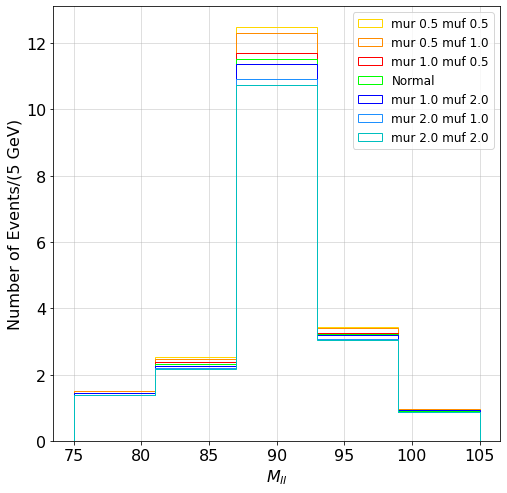

In [9]:
LHEscaleIdx = [0,1,3,4,5,7,8]
LHEScalemap = {0:"mur 0.5 muf 0.5",
               1:"mur 0.5 muf 1.0",
               3:"mur 1.0 muf 0.5",
               4:"Normal",
               5:"mur 1.0 muf 2.0",
               7:"mur 2.0 muf 1.0",
               8:"mur 2.0 muf 2.0",
              }

LHEScaleCmap ={
                0:"gold",
                1:"darkorange",
                3:"red",
                4:"lime",
                5:"blue",
                7:"dodgerblue",
                8:"c"
}

plt.close()
plt.figure(figsize=(8, 8))  # Figure size
bins = np.linspace(75, 105, 6)  # divide start-end range with 'bin' number
binwidth = (105 - 75) / 6  # width of one bin


hist_list=[]
for idx in LHEscaleIdx:
    arrays['Generator_weight_sgn'] = arrays['Generator_weight']  / abs(arrays['Generator_weight'])
    arrays['true_weight'] = arrays['LHEScaleWeight'][:,idx] * arrays['puWeight'] * lumi * filelist_MC['WZG']['xsec'] * 1000 * arrays['Generator_weight_sgn'] / true_events

    x=plt.hist(arrays['WZG_dileptonmass'], weights=arrays['true_weight'],bins=bins, histtype='step',color=LHEScaleCmap[idx],label=LHEScalemap[idx])  # label is needed to draw legend
    hist_list.append(x)
    #lt.hist(arrays['WZG_dileptonmass'],bins=bins,histtype='step',label=LHEScalemap[idx])  # label is needed to draw legend
    

plt.xticks(fontsize=16)  # xtick size
plt.xlabel('$M_{ll}$', fontsize=16)  # X-label    
plt.ylabel("Number of Events/(%d GeV)" % binwidth, fontsize=16)
plt.yticks(fontsize=16) 
    
plt.grid(alpha=0.5)
plt.legend(prop={"size": 12}) 

## Make delta( normal , upper or lower )

In [10]:
rows=[]
columns=[0,1,2,3,4]
for w in hist_list:
    print(hist_list[3][0] - w[0])
    rows.append(hist_list[3][0] - w[0])
error_df = pd.DataFrame(rows,columns=columns)
error_df

[-0.06400993 -0.20895189 -0.9545449  -0.2084872  -0.04070431]
[-0.06997592 -0.14825635 -0.76388706 -0.1885378  -0.05769401]
[ 0.00888106 -0.05193968 -0.16785381 -0.01561622  0.01578147]
[0. 0. 0. 0. 0.]
[-0.00170797  0.05673143  0.1691906   0.01850428 -0.01670778]
[0.05717605 0.12175408 0.62854973 0.15519829 0.04733761]
[0.05314215 0.17152849 0.78083592 0.17060716 0.03191954]


,0,1,2,3,4
0,-0.064010,-0.208952,-0.954545,-0.208487,-0.040704
1,-0.069976,-0.148256,-0.763887,-0.188538,-0.057694
2,0.008881,-0.051940,-0.167854,-0.015616,0.015781
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.001708,0.056731,0.169191,0.018504,-0.016708
5,0.057176,0.121754,0.628550,0.155198,0.047338
6,0.053142,0.171528,0.780836,0.170607,0.031920


In [11]:
## upper
error_df.loc[0:2].abs().max()

0    0.069976
1    0.208952
2    0.954545
3    0.208487
4    0.057694
dtype: float64

In [12]:
## Upper uncertainty
error_df.loc[0:2].abs().max() / hist_list[3][0]

0    0.048271
1    0.089508
2    0.082819
3    0.064545
4    0.062805
dtype: float64

In [13]:
## lower
error_df.loc[4:7].abs().max()

0    0.057176
1    0.171528
2    0.780836
3    0.170607
4    0.047338
dtype: float64

In [14]:
# Lowe uncertainty
error_df.loc[4:7].abs().max() / hist_list[3][0]

0    0.039441
1    0.073477
2    0.067748
3    0.052818
4    0.051531
dtype: float64

## Draw Uncertainty plot

In [15]:
# Make middle point of histogram to build error plot
middle_point_bin=[]
for i in range(len(hist_list[0][1])-1):
    middle_point_bin.append((hist_list[0][1][i+1] +  hist_list[0][1][i])/2)
print(middle_point_bin)

[78.0, 84.0, 90.0, 96.0, 102.0]


[]

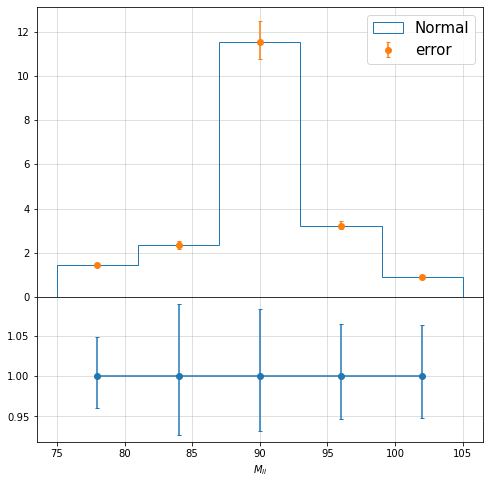

In [16]:
from matplotlib import gridspec
arrays['Generator_weight_sgn'] = arrays['Generator_weight']  / abs(arrays['Generator_weight'])
arrays['true_weight'] = arrays['LHEScaleWeight'][:,4] * arrays['puWeight'] * lumi * filelist_MC['WZG']['xsec'] * 1000 * arrays['Generator_weight_sgn'] / true_events
plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
ax0 = plt.subplot(gs[0])




bins = np.linspace(75, 105, 6)  # divide start-end range with 'bin' number
binwidth = (105 - 75) / 6  # width of one bin

ax0.hist(arrays['WZG_dileptonmass'],weights=arrays['true_weight'],bins=bins, histtype='step',label=LHEScalemap[4])
ax0.errorbar(middle_point_bin,hist_list[3][0],[error_df.loc[4:7].abs().max(),error_df.loc[0:2].abs().max()],fmt='o',linestyle='',capsize=2,label='error')
 

    
ax0.grid(alpha=0.5)
ax0.legend(prop={"size": 15}) 

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(middle_point_bin,hist_list[3][0]/hist_list[3][0],[error_df.loc[4:7].abs().max()/hist_list[3][0],error_df.loc[0:2].abs().max()/hist_list[3][0]],fmt='o-',capsize=2,label='error')
ax1.grid(alpha=0.5)
plt.xlabel('$M_{ll}$')
plt.setp(ax0.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
plt.plot()

# Ch2. Pdf Weight calculation

In [7]:
arrays['LHEPdfWeight'][:,0]

<Array [1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1] type='37 * float32'>

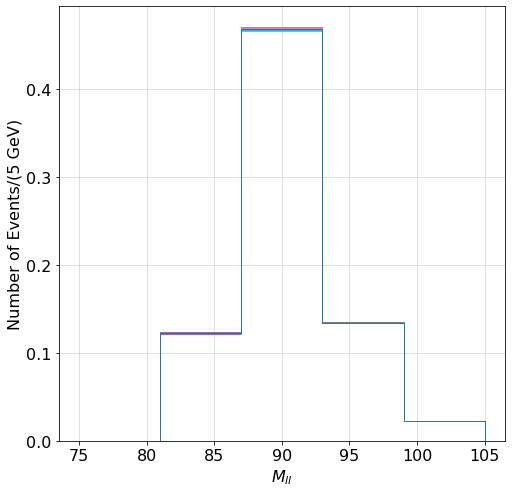

In [8]:
plt.close()
plt.figure(figsize=(8, 8))  # Figure size
bins = np.linspace(75, 105, 6)  # divide start-end range with 'bin' number
binwidth = (105 - 75) / 6  # width of one bin


hist_list=[]
for idx in range(0,101):
    arrays['Generator_weight_sgn'] = arrays['Generator_weight']  / abs(arrays['Generator_weight'])
    arrays['true_weight'] = arrays['LHEPdfWeight'][:,idx] * arrays['puWeight'] * lumi * filelist_MC['WZG']['xsec'] * 1000 * arrays['Generator_weight_sgn'] / true_events
    
    x=plt.hist(arrays['WZG_dileptonmass'], weights=arrays['true_weight'],bins=bins, histtype='step')  # label is needed to draw legend
    hist_list.append(x)
    #lt.hist(arrays['WZG_dileptonmass'],bins=bins,histtype='step',label=LHEScalemap[idx])  # label is needed to draw legend
    

plt.xticks(fontsize=16)  # xtick size
plt.xlabel('$M_{ll}$', fontsize=16)  # X-label    
plt.ylabel("Number of Events/(%d GeV)" % binwidth, fontsize=16)
plt.yticks(fontsize=16) 
    
plt.grid(alpha=0.5)

In [9]:
len(hist_list)

101

In [10]:
hist_list[0][0]

array([0.        , 0.12313773, 0.46834385, 0.13443105, 0.02251391])

In [11]:
rows=[]
columns=[0,1,2,3,4]
for w in hist_list:
    rows.append(hist_list[0][0] - w[0])
error_df = pd.DataFrame(rows,columns=columns)
error_df

,0,1,2,3,4
0,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000
1,0.0,1.865290e-04,0.000070,-5.650241e-05,0.000007
2,0.0,9.279698e-06,0.000519,1.937877e-04,0.000023
3,0.0,7.643122e-04,0.000156,9.654276e-05,0.000084
4,0.0,-2.502762e-04,-0.000562,4.015863e-06,-0.000041
...,...,...,...,...,...
96,0.0,5.079992e-05,0.000022,2.664607e-05,0.000001
97,0.0,-1.461990e-05,0.000192,-4.800968e-06,-0.000001
98,0.0,9.190291e-05,-0.000086,6.960705e-06,0.000004
99,0.0,-9.890459e-05,-0.000137,-3.052317e-05,-0.000005


In [12]:
error_df.min()

0    0.000000
1   -0.000996
2   -0.002344
3   -0.001006
4   -0.000166
dtype: float64

In [13]:
# lower unc
error_df.min()/hist_list[0][0]

0         NaN
1   -0.008087
2   -0.005004
3   -0.007486
4   -0.007385
dtype: float64

In [14]:
error_df.max()

0    0.000000
1    0.000875
2    0.001895
3    0.000518
4    0.000107
dtype: float64

In [15]:
#upper unc
error_df.max()/hist_list[0][0]

0         NaN
1    0.007102
2    0.004045
3    0.003856
4    0.004761
dtype: float64

In [16]:
# Make middle point of histogram to build error plot
middle_point_bin=[]
for i in range(len(hist_list[0][1])-1):
    middle_point_bin.append((hist_list[0][1][i+1] +  hist_list[0][1][i])/2)
print(middle_point_bin)

[78.0, 84.0, 90.0, 96.0, 102.0]


/tmp/ipykernel_889/4221915707.py:23: RuntimeWarning: invalid value encountered in true_divide
  ax1.errorbar(middle_point_bin,hist_list[0][0]/hist_list[0][0],[abs(error_df.min())/hist_list[0][0],error_df.max()/hist_list[0][0]],fmt='o-',capsize=2,label='error')


[]

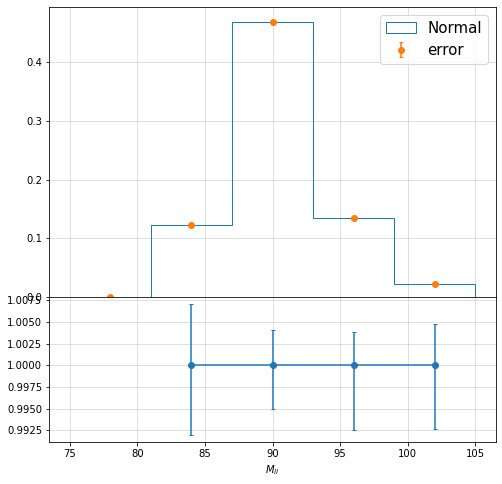

In [17]:
from matplotlib import gridspec
arrays['Generator_weight_sgn'] = arrays['Generator_weight']  / abs(arrays['Generator_weight'])
arrays['true_weight'] = arrays['LHEPdfWeight'][:,0] * arrays['puWeight'] * lumi * filelist_MC['WZG']['xsec'] * 1000 * arrays['Generator_weight_sgn'] / true_events
plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
ax0 = plt.subplot(gs[0])




bins = np.linspace(75, 105, 6)  # divide start-end range with 'bin' number
binwidth = (105 - 75) / 6  # width of one bin

ax0.hist(arrays['WZG_dileptonmass'],weights=arrays['true_weight'],bins=bins, histtype='step',label='Normal')
ax0.errorbar(middle_point_bin,hist_list[0][0],[abs(error_df.min()),error_df.max()],fmt='o',linestyle='',capsize=2,label='error')
 

    
ax0.grid(alpha=0.5)
ax0.legend(prop={"size": 15}) 

ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.errorbar(middle_point_bin,hist_list[0][0]/hist_list[0][0],[abs(error_df.min())/hist_list[0][0],error_df.max()/hist_list[0][0]],fmt='o-',capsize=2,label='error')
ax1.grid(alpha=0.5)
plt.xlabel('$M_{ll}$')
plt.setp(ax0.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)
plt.plot()